In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import numpy as np
import os
import pdb
import matplotlib.pyplot as plt

In [5]:
def one_hot(x, n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x), n))
    o_h[np.arange(len(x)), x] = 1
    return o_h

In [6]:
datasets_dir = '/Users/manojyaramsetty/fsl_hw2/data/'

In [7]:
def mnist(noTrSamples=1000, noTsSamples=100, digit_range=[0, 10], noTrPerClass=100, noTsPerClass=10):
    data_dir = os.path.join(datasets_dir, 'mnist/')
    fd = open(os.path.join(data_dir, 'train-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    trData = loaded[16:].reshape((60000, 28*28)).astype(float)

    fd = open(os.path.join(data_dir, 'train-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    trLabels = loaded[8:].reshape((60000)).astype(float)

    fd = open(os.path.join(data_dir, 't10k-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    tsData = loaded[16:].reshape((10000, 28*28)).astype(float)

    fd = open(os.path.join(data_dir, 't10k-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd, dtype=np.uint8)
    tsLabels = loaded[8:].reshape((10000)).astype(float)

    trData = trData/255.
    tsData = tsData/255.

    tsX = np.zeros((noTsSamples, 28*28))
    trX = np.zeros((noTrSamples, 28*28))
    tsY = np.zeros(noTsSamples)
    trY = np.zeros(noTrSamples)

    count = 0
    for ll in range(digit_range[0], digit_range[1]):
        # Train data
        idl = np.where(trLabels == ll)
        idl = idl[0][: noTrPerClass]
        idx = list(range(count*noTrPerClass, (count+1)*noTrPerClass))
        trX[idx, :] = trData[idl, :]
        trY[idx] = trLabels[idl]
        # Test data
        idl = np.where(tsLabels == ll)
        idl = idl[0][: noTsPerClass]
        idx = list(range(count*noTsPerClass, (count+1)*noTsPerClass))
        tsX[idx, :] = tsData[idl, :]
        tsY[idx] = tsLabels[idl]
        count += 1
    
    np.random.seed(1)
    test_idx = np.random.permutation(tsX.shape[0])
    tsX = tsX[test_idx,:]
    tsY = tsY[test_idx]

    trX = trX.T
    tsX = tsX.T
    trY = trY.reshape(1, -1)
    tsY = tsY.reshape(1, -1)
    return trX, trY, tsX, tsY

In [8]:
trX, trY, tsX, tsY = mnist(noTrSamples=1000,
                               noTsSamples=100, digit_range=[0, 10],
                               noTrPerClass=100, noTsPerClass=10)

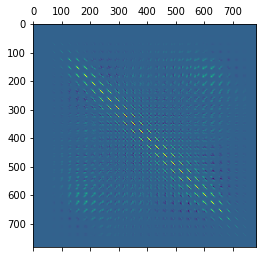

In [24]:
covr = np.cov(trX)
plt.matshow(covr)

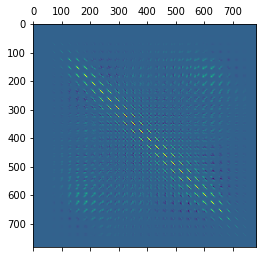

0.9283837890018373

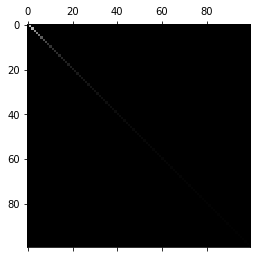

In [81]:
U,S,V = np.linalg.svd(np.cov(trX))
U100 = U[:,0:100]
pcatrX = np.dot(U100.T, trX)
plt.matshow(np.cov(pcatrX), cmap='gray')

In [70]:
# Variance
np.sum(S[0:100])/np.sum(S)

0.9283837890018373

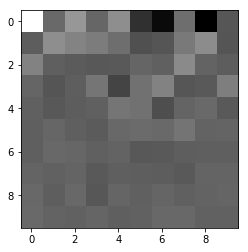

In [80]:
zero = pcatrX[:,99]
final_img = zero.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

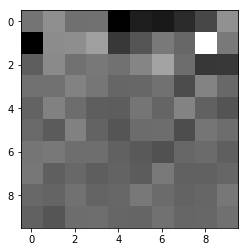

In [72]:
one = pcatrX[:,101]
final_img = one.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

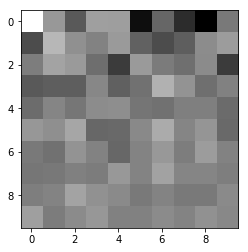

In [73]:
two = pcatrX[:,201]
final_img = two.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

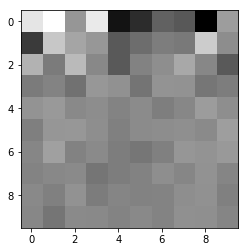

In [74]:
three = pcatrX[:,301]
final_img = three.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

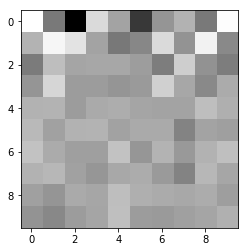

In [75]:
four = pcatrX[:,401]
final_img = four.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

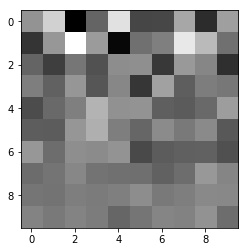

In [76]:
five = pcatrX[:,501]
final_img = five.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

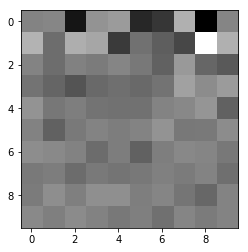

In [77]:
seven = pcatrX[:,701]
final_img = seven.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

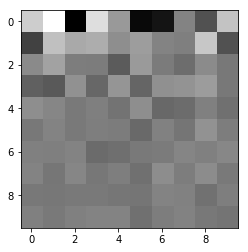

In [78]:
eight = pcatrX[:,801]
final_img = eight.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

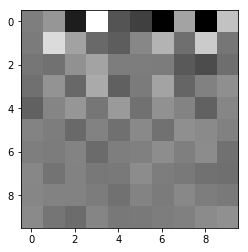

In [79]:
nine = pcatrX[:,901]
final_img = nine.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

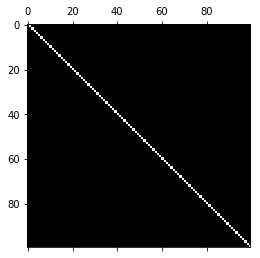

In [69]:
#pca whitening
e=1E-3
xPCAwhite = np.diag(1. / np.sqrt(S[0:100]+e)) * (U100.T * trX)
plt.matshow(np.cov(xPCAwhite), cmap='gray')

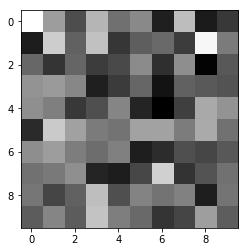

In [30]:
img = xPCAwhite[:,1]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

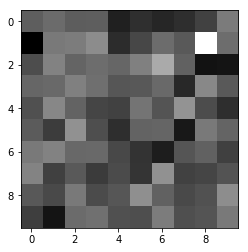

In [32]:
img = xPCAwhite[:,101]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

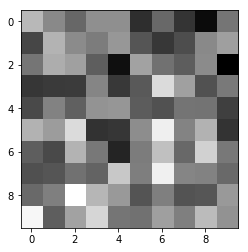

In [33]:
img = xPCAwhite[:,201]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

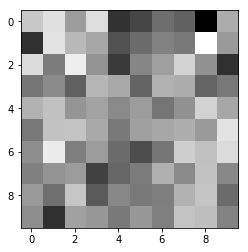

In [34]:
img = xPCAwhite[:,301]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

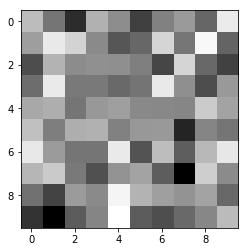

In [35]:
img = xPCAwhite[:,401]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

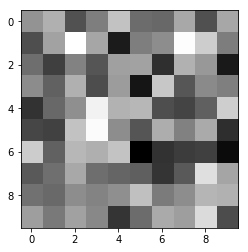

In [36]:
img = xPCAwhite[:,501]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

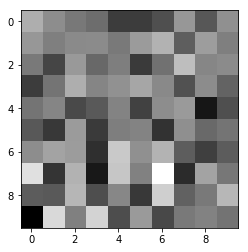

In [37]:
img = xPCAwhite[:,601]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

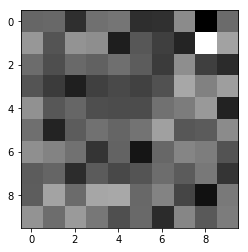

In [38]:
img = xPCAwhite[:,701]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

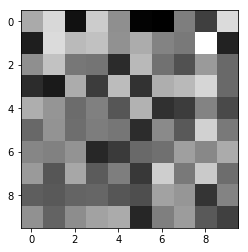

In [39]:
img = xPCAwhite[:,801]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

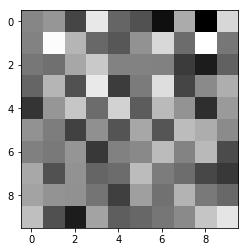

In [68]:
img = xPCAwhite[:,901]
final_img = img.reshape((10, 10))
plt.imshow(final_img, cmap='gray')

In [42]:
#ZCA Whitening
xZCAwhite = U[:,0:100] * np.diag(1. / np.sqrt(S[0:100]+e)) * U[:,0:100].T * trX;

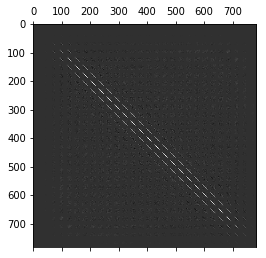

In [43]:
plt.matshow(np.cov(xZCAwhite), cmap='gray')

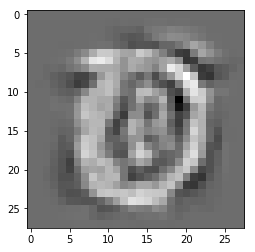

In [67]:
img = xZCAwhite[:784,45]
final_img = img.reshape((28, 28))
plt.imshow(final_img, cmap='gray')

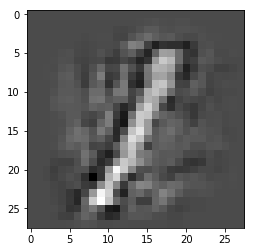

In [66]:
img = xZCAwhite[:784,159]
final_img = img.reshape((28, 28))
plt.imshow(final_img, cmap='gray')

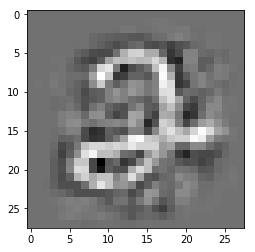

In [65]:
img = xZCAwhite[:,247]
final_img = two1.reshape((28, 28))
plt.imshow(final_img , cmap='gray')

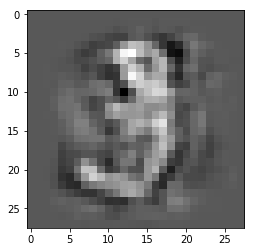

In [64]:
img = xZCAwhite[:,381]
final_img = three.reshape((28, 28))
plt.imshow(final_img , cmap='gray')

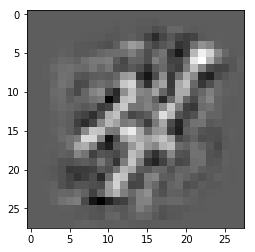

In [63]:
img = xZCAwhite[:,441]
final_img = four.reshape((28, 28))
plt.imshow(final_img , cmap='gray')

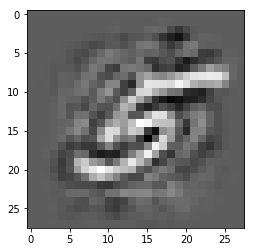

In [62]:
img = xZCAwhite[:,511]
final_img = five.reshape((28, 28))
plt.imshow(final_img , cmap='gray')

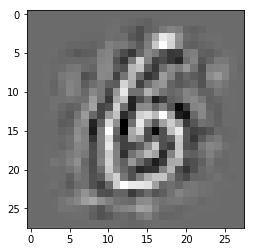

In [61]:
img = xZCAwhite[:,661]
final_img = six.reshape((28, 28))
plt.imshow(final_img , cmap='gray')

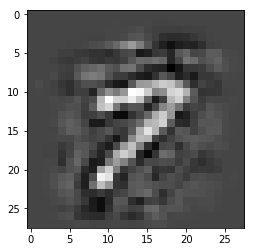

In [60]:
img = xZCAwhite[:,721]
final_img = seven.reshape((28, 28))
plt.imshow(final_img , cmap='gray')

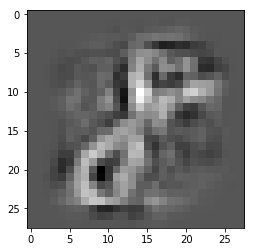

In [59]:
img = xZCAwhite[:,821]
final_img = eight.reshape((28, 28))
plt.imshow(final_img , cmap='gray')

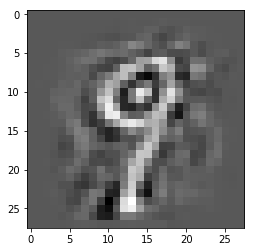

In [57]:
img = xZCAwhite[:,925]
final_img = nine.reshape((28, 28))
plt.imshow(final_img, cmap='gray')

In [86]:
from numpy.linalg import inv
from scipy.spatial import distance

classTrain0 = pcatrX[:, 0:100]
classTrain1 = pcatrX[:, 100:200]
sw = np.cov(classTrain0) + np.cov(classTrain1)
meanTrain0 = classTrain0.mean(1)
meanTrain1 = classTrain1.mean(1)
w = np.dot(inv(np.cov(sw)), (meanTrain1 - meanTrain0))
meanTrain_w0 = np.dot(w.T, meanTrain0)
meanTrain_w1 = np.dot(w.T, meanTrain1)
test0 = np.dot(w.T, np.dot(U100.T, tsX[:, 0:10]))
test1 = np.dot(w.T, np.dot(U100.T, tsX[:, 10:20]))
a=0
for i in range(0,10):
    d1 = distance.euclidean(test0[:,i],meanTrain_w0)
    d2 = distance.euclidean(test0[:,i],meanTrain_w1)
    if(d1 > d2):
        a += 1
    d1 = distance.euclidean(test1[:,i],meanTrain_w0)
    d2 = distance.euclidean(test1[:,i],meanTrain_w1)
    if(d2 > d1):
        a += 1

total = 20   
a = (a/total)*100

print("Accuracy :", a)

IndexError: too many indices for array

array([[ 3.79994422e+12,  5.27646351e+13,  3.34588029e+13, ...,
         2.90875958e+13,  5.15486096e+13, -2.37559150e+13],
       [ 5.27646351e+13,  7.32670417e+14,  4.64596695e+14, ...,
         4.03899713e+14,  7.15785132e+14, -3.29865943e+14],
       [ 3.34588029e+13,  4.64596695e+14,  2.94607349e+14, ...,
         2.56118532e+14,  4.53889497e+14, -2.09172670e+14],
       ...,
       [ 2.90875958e+13,  4.03899713e+14,  2.56118532e+14, ...,
         2.22658066e+14,  3.94591351e+14, -1.81845420e+14],
       [ 5.15486096e+13,  7.15785132e+14,  4.53889497e+14, ...,
         3.94591351e+14,  6.99288990e+14, -3.22263780e+14],
       [-2.37559150e+13, -3.29865943e+14, -2.09172670e+14, ...,
        -1.81845420e+14, -3.22263780e+14,  1.48513626e+14]])

In [52]:
class0.shape

(784, 100)

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
whitened = pca.fit_transform(trX.T).T

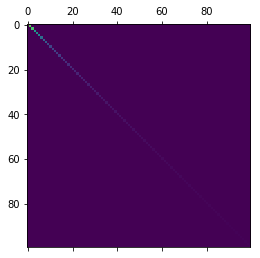

In [97]:
plt.matshow(abs(np.cov(whitened)))

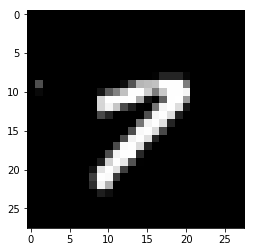

In [98]:
seven = trX[:,701]
pixels = seven.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

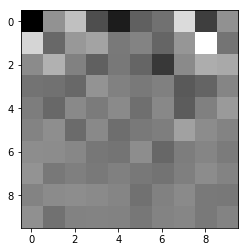

In [90]:
seven = whitened[:,101]
pixels = seven.reshape((10, 10))
plt.imshow(pixels, cmap='gray')

(100, 1000)


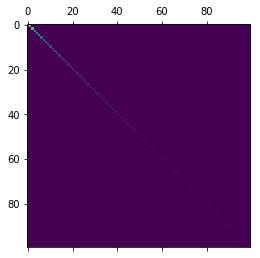

In [195]:
avg = trX.mean(1)
U,S,V = np.linalg.svd(covr1)
pcatrX = np.dot(U[:,0:100].T, trX)
plt.matshow(np.cov(pcatrX))
print(pcatrX.shape)

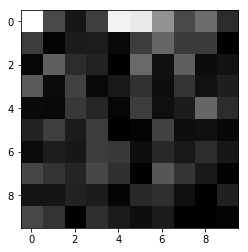

In [196]:
six = abs(pcatrX[:,601])
pixels = six.reshape((10, 10))
plt.imshow(pixels, cmap='gray')

In [186]:
e=1E-3
xPCAwhite = np.diag(1. / np.sqrt(S[0:100]+e)) * (U[:,0:100].T * trX);
print(xPCAwhite.shape)

(100, 1000)


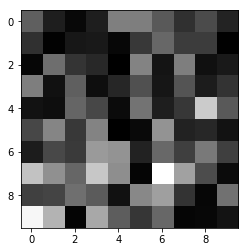

In [197]:
six = abs(xPCAwhite[:,601])
pixels = six.reshape((10, 10))
plt.imshow(pixels, cmap='gray')

In [190]:
xZCAwhite = U[:,0:100] * np.diag(1. / np.sqrt(S[0:100]+e)) * U[:,0:100].T * trX;

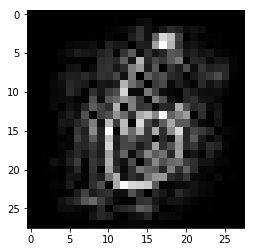

In [198]:
six = abs(xZCAwhite[:,601])
pixels = six.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

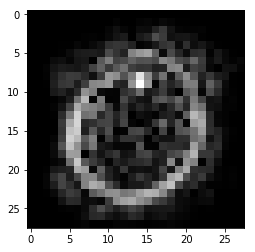

In [199]:
six = abs(xZCAwhite[:,21])
pixels = six.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

In [271]:
tsX.shape

(784, 100)

In [87]:
from numpy.linalg import inv
from scipy.spatial import distance

classTrain0 = pcatrX[:, 0:100]
classTrain1 = pcatrX[:, 100:200]
sw = np.cov(classTrain0) + np.cov(classTrain1)
meanTrain0 = classTrain0.mean(1)
meanTrain1 = classTrain1.mean(1)
w = np.dot(inv(np.cov(sw)), (meanTrain1 - meanTrain0))
meanTrain_w0 = np.dot(w.T, meanTrain0)
meanTrain_w1 = np.dot(w.T, meanTrain1)
test0 = np.dot(w.T, np.dot(U100.T, tsX[:, 0:10]))
test1 = np.dot(w.T, np.dot(U100.T, tsX[:, 10:20]))
a=0
for i in range(0,10):
    d1 = distance.euclidean(test0[:,i],meanTrain_w0)
    d2 = distance.euclidean(test0[:,i],meanTrain_w1)
    if(d1 > d2):
        a += 1
    d1 = distance.euclidean(test1[:,i],meanTrain_w0)
    d2 = distance.euclidean(test1[:,i],meanTrain_w1)
    if(d2 > d1):
        a += 1

total = 20   
a = (a/total)*100

IndexError: too many indices for array